# Explore here

In [5]:
# Your import os
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Set a random seed to ensure reproducibility across runs
RNG_SEED = 42
np.random.seed(seed=RNG_SEED)

#STEP 1) Connect to the database and convert it to a dataframe
PATH = os.getcwd()
data_path = os.path.join(PATH, '/workspaces/Data_Preprocessing_Project_TutorialDianaM/data/raw/AB_NYC_2019.csv')

df = pd.read_csv(data_path)
print(f'Full DataFrame shape: {df.shape}')

#STEP 2) First data overview
df.info()
df.head(4)

# STEP 3) Problem statement: We want to assess the correlation between availability and other potentially related indicators such as number of reviews (i.e. this will help us understand how important it is to encourage hosts to leave a review in order to, appart from non-directly increasing listing quality, increasing number of bookings/revenue = decreasing overall availability),
# Problem: We need to find the main variables that are clearly impacting price
# Do we have occupation rate (number of booked days a year / number of available days a year? (lookg for the level of relation between occupation with number of reviews)

Full DataFrame shape: (48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [3]:
# STEP 4) Dduplicates control:

# BY "id"
df.duplicated("id").sum()


np.int64(0)

In [5]:
# STEP 4) Dduplicates control:

# Total
df.duplicated().sum()


np.int64(0)

In [4]:
# STEP 4) Dduplicates control except "id"
df.drop("id", axis = 1).duplicated().sum()
# df.drop("id", axis=1): This part creates a temporary copy of the DataFrame df with the 'id' column removed using drop(). axis=1 specifies that we are dropping a column.

np.int64(0)

In [6]:
# STEP 5) Selecting atributes (excluding the non-relevant ones):

df.drop(["id", "name", "host_name", "host_id"], axis = 1, inplace = True)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
# Check the status of the database

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     38843 non-null  object 
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(

In [7]:
# STEP 6) Missing or Nan values: identify them

df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
# STEP 6) Missing or Nan values:

# 6.A) Filling missing values ('last_review'):

df["last_review"].fillna("Missing date", inplace = True)
df["last_review"].head(50)

/tmp/ipykernel_38368/3564901253.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["last_review"].fillna("Missing date", inplace = True)


0       2018-10-19
1       2019-05-21
2     Missing date
3       2019-07-05
4       2018-11-19
5       2019-06-22
6       2017-10-05
7       2019-06-24
8       2017-07-21
9       2019-06-09
10      2019-06-22
11      2019-06-23
12      2019-06-24
13      2019-07-05
14      2018-10-31
15      2019-06-29
16      2019-06-28
17      2019-07-01
18      2019-06-22
19    Missing date
20      2011-12-28
21      2019-07-01
22      2019-01-01
23      2019-07-02
24      2019-06-19
25      2019-06-23
26    Missing date
27      2017-08-13
28      2019-06-15
29      2019-04-19
30      2019-06-01
31      2019-06-14
32      2019-06-15
33      2019-07-01
34      2019-05-12
35      2019-06-21
36    Missing date
37      2019-06-22
38    Missing date
39      2019-07-05
40      2019-06-21
41      2019-05-27
42      2018-09-30
43      2019-06-16
44      2019-06-13
45      2019-06-05
46      2019-07-01
47      2019-05-25
48      2017-01-01
49      2019-06-17
Name: last_review, dtype: object

In [9]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
# STEP 6) Missing or Nan values: Filling missing values ('reviews_per_month'): Identifying which variables are more related to reviews_per_month
# In order to do so, we need to:

# 6.A) Convert to numeric the categorical variables (by factorize())

    # By first grouping related variables: groupoing "neighbourhood"-related variables into one ("Area")

df["Area"] = df["neighbourhood_group"] + "/" + df["neighbourhood"]
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Area
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Brooklyn/Kensington
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Manhattan/Midtown
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Missing date,NaN,1,365,Manhattan/Harlem
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Brooklyn/Clinton Hill
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Manhattan/East Harlem
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,Missing date,NaN,2,9,Brooklyn/Bedford-Stuyvesant
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,Missing date,NaN,2,36,Brooklyn/Bushwick
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,Missing date,NaN,1,27,Manhattan/Harlem
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,Missing date,NaN,6,2,Manhattan/Hell's Kitchen


In [9]:
# STEP 6) Missing or Nan values: Filling missing values ('reviews_per_month'): Identifying which variables are more related to reviews_per_month

# 6.A) Convert to numeric the -grouped- categorical variables (by factorize()): "room_type", "last_review" and "Area"
import pandas as pd
df['room_type_n'] = pd.factorize(df['room_type'])[0]
df['last_review_n'] = pd.factorize(df['last_review'])[0]
df['Area_n'] = pd.factorize(df['Area'])[0]
df['neighbourhood_group_n'] = pd.factorize(df['neighbourhood_group'])[0]
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Area,room_type_n,last_review_n,Area_n,neighbourhood_group_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Brooklyn/Kensington,0,0,0,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Manhattan/Midtown,1,1,1,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Missing date,NaN,1,365,Manhattan/Harlem,0,2,2,1
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Brooklyn/Clinton Hill,1,3,3,0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Manhattan/East Harlem,1,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,Missing date,NaN,2,9,Brooklyn/Bedford-Stuyvesant,0,2,6,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,Missing date,NaN,2,36,Brooklyn/Bushwick,0,2,21,0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,Missing date,NaN,1,27,Manhattan/Harlem,1,2,2,1
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,Missing date,NaN,6,2,Manhattan/Hell's Kitchen,2,2,7,1


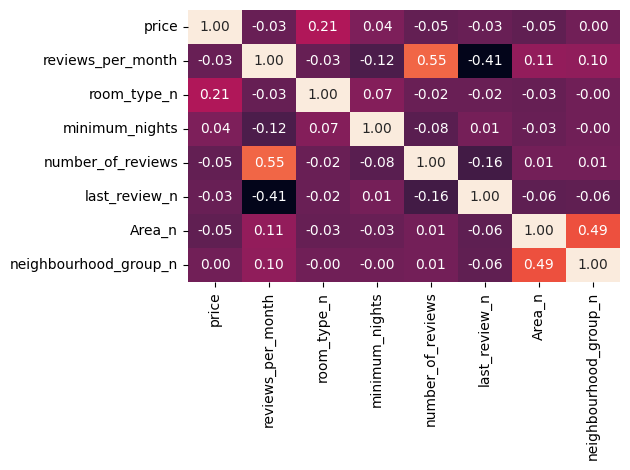

In [ ]:
# STEP 6) Missing or Nan values: Filling missing values ('reviews_per_month'): Identifying which variables are more related to reviews_per_month

# 6.B) Create a multiple scatter diagram to figure variables correlated enough with "reviews_per_month" to fill up missing values 
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap using the factorized variables
sns.heatmap(df[["price",'reviews_per_month', 'room_type_n', "minimum_nights", "number_of_reviews", 'last_review_n', 'Area_n', 'neighbourhood_group_n']].corr(), annot = True, fmt = ".2f", cbar = False)
plt.tight_layout()
plt.show()


In [ ]:
# NO SE PUEDE EJECUTAR - BLOQUEA EL KERNEL:

# STEP 6) Missing or Nan values: Filling missing values ('reviews_per_month'): 

# 6.C) Filling missing values ('reviews_per_month') with KNNImputer based on the certain correlation between this variable and "number_of_reviews" (0,55) and with "last_review_n" (-0,41)

from sklearn.impute import KNNImputer

cols_for_imputation = ["number_of_reviews", "last_review_n", "reviews_per_month"]
df_cols = df[cols_for_imputation]

impute_knn = KNNImputer(n_neighbors=2)
impute_knn.fit_transform(df_cols)
df_cols

print("After applying the KNNImputer method and confirming there are still Nans, we still need to further deal with Nans in this column when there are no reviews.")


: 

In [10]:
# STEP 6) Missing or Nan values: Filling missing values ('reviews_per_month'): 

# 6.C) Filling missing values ('reviews_per_month') with KNNImputer: confirming the number of ceros in "number_of_reviews" conincides with the number of ceros in 'reviews_per_month'
filtered_df = df[df["reviews_per_month"].isnull()]
final_filtered_df = filtered_df[filtered_df['number_of_reviews'] == 0]
count = len(final_filtered_df)
count

10052

In [13]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
Area                                  0
room_type_n                           0
last_review_n                         0
Area_n                                0
neighbourhood_group_n                 0
dtype: int64

In [14]:
# STEP 6) Missing or Nan values: Filling missing values ('reviews_per_month'): 
# 6.D) Given the previous setp, we use the fillna() to fill up the Nans in this column

df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df

print("In order to further deal with the remaining Nans in'reviews_per_month', we turn them ")

In order to further deal with the remaining Nans in'reviews_per_month', we turn them 


In [12]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
Area                              0
room_type_n                       0
last_review_n                     0
Area_n                            0
neighbourhood_group_n             0
dtype: int64

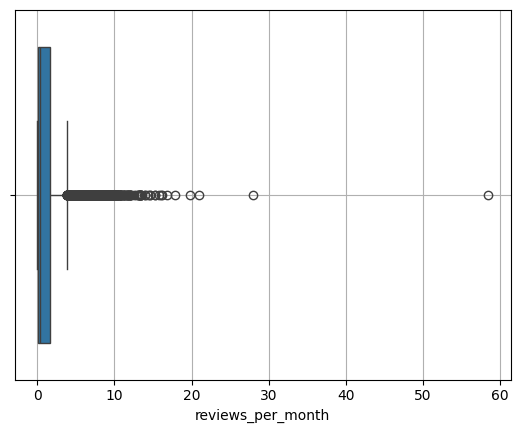

In [15]:
# STEP 6) Missing or Nan values: Filling missing values ('reviews_per_month'): 

# 6.E) Other ways of filling missing values in ('reviews_per_month') with the mean if there are not outliers

    # Identify outliers in 'reviews_per_month' using a boxplot

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data = df, x = 'reviews_per_month').grid(True)
plt.show()

In [ ]:
# NO EJECUTAR - SE USÓ FILLNA(0)

# STEP 6) Missing or Nan values: Filling missing values ('reviews_per_month') 

# 6.F) NOT TO EXECUTE - ALTERNATIVE - : Filling missing values with the median since there are outliers and there aren't correlated enough variables to 'reviews_per_month'

df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace = True)

/tmp/ipykernel_29857/3928939697.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace = True)


In [16]:
df['reviews_per_month'].isnull().sum()

np.int64(0)

In [19]:
df['reviews_per_month'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48895 entries, 0 to 48894
Series name: reviews_per_month
Non-Null Count  Dtype  
--------------  -----  
48895 non-null  float64
dtypes: float64(1)
memory usage: 382.1 KB


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     48895 non-null  object 
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
 12  Area                            

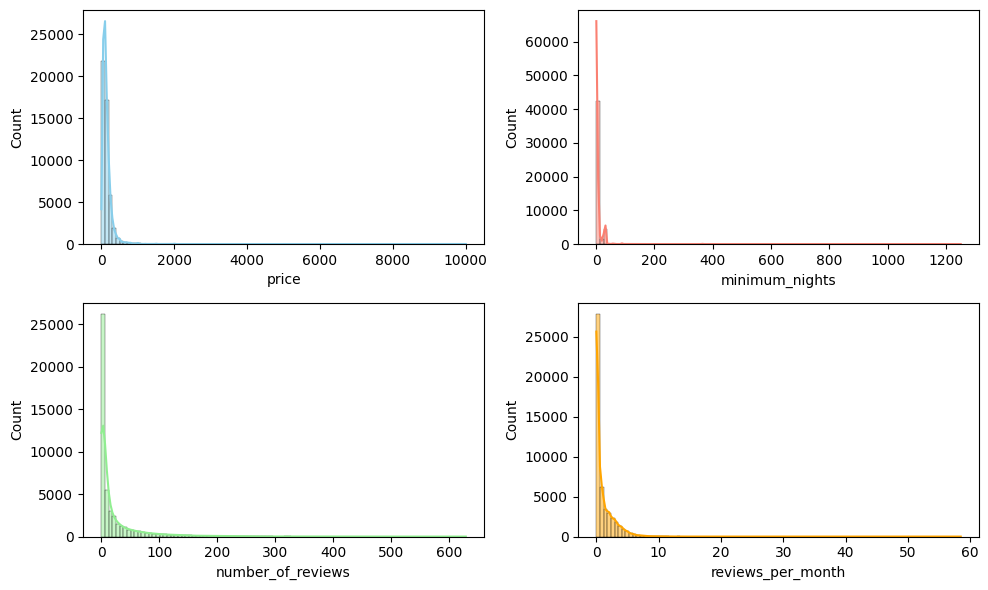

In [17]:
# STEP 7) First Univariate Numerical Variables Analysis Visualization: 'price', 'minimum_nights', 'number_of_reviews','reviews_per_month'

fig, axis = plt.subplots(2, 2, figsize=(10, 6))
sns.histplot(ax=axis[0, 0], data=df, x="price", bins=100, kde=True, color='skyblue')
sns.histplot(ax=axis[0, 1], data=df, x="minimum_nights", bins=100, kde=True, color='salmon')
sns.histplot(ax=axis[1, 0], data=df, x="number_of_reviews", bins=100, kde=True, color='lightgreen')
sns.histplot(ax=axis[1, 1], data=df, x="reviews_per_month", bins=100, kde=True, color='orange')
plt.tight_layout()
plt.show()

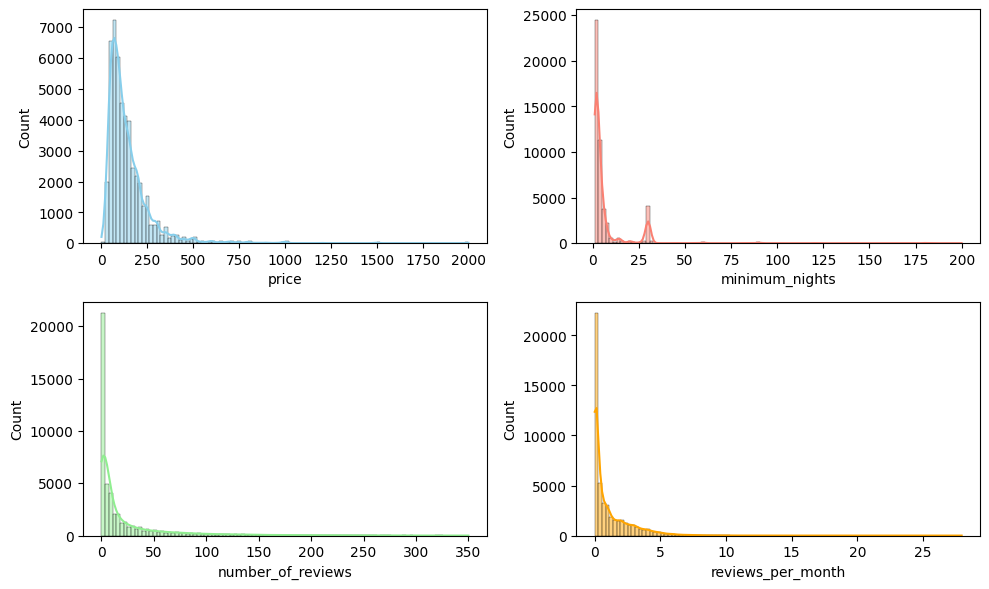

In [18]:
# STEP 7) Univariate Numerical Variables Analysis Visualization: 'price', 'minimum_nights', 'number_of_reviews','reviews_per_month'

# 7.A) Zooming in Univariate Numerical Variables Analysis Visualization (roughly below upper outliers): 

fig, axis = plt.subplots(2, 2, figsize=(10, 6))
sns.histplot(ax=axis[0, 0], data=df, x=df[df["price"] <= 2000]["price"], bins=100, kde=True, color='skyblue')
sns.histplot(ax=axis[0, 1], data=df, x=df[df["minimum_nights"] <= 200]["minimum_nights"], bins=100, kde=True, color='salmon')
sns.histplot(ax=axis[1, 0], data=df, x=df[df["number_of_reviews"] <= 350]["number_of_reviews"], bins=100, kde=True, color='lightgreen')
sns.histplot(ax=axis[1, 1], data=df, x=df[df["reviews_per_month"] <= 30]["reviews_per_month"], bins=100, kde=True, color='orange')
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_38368/1304880776.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


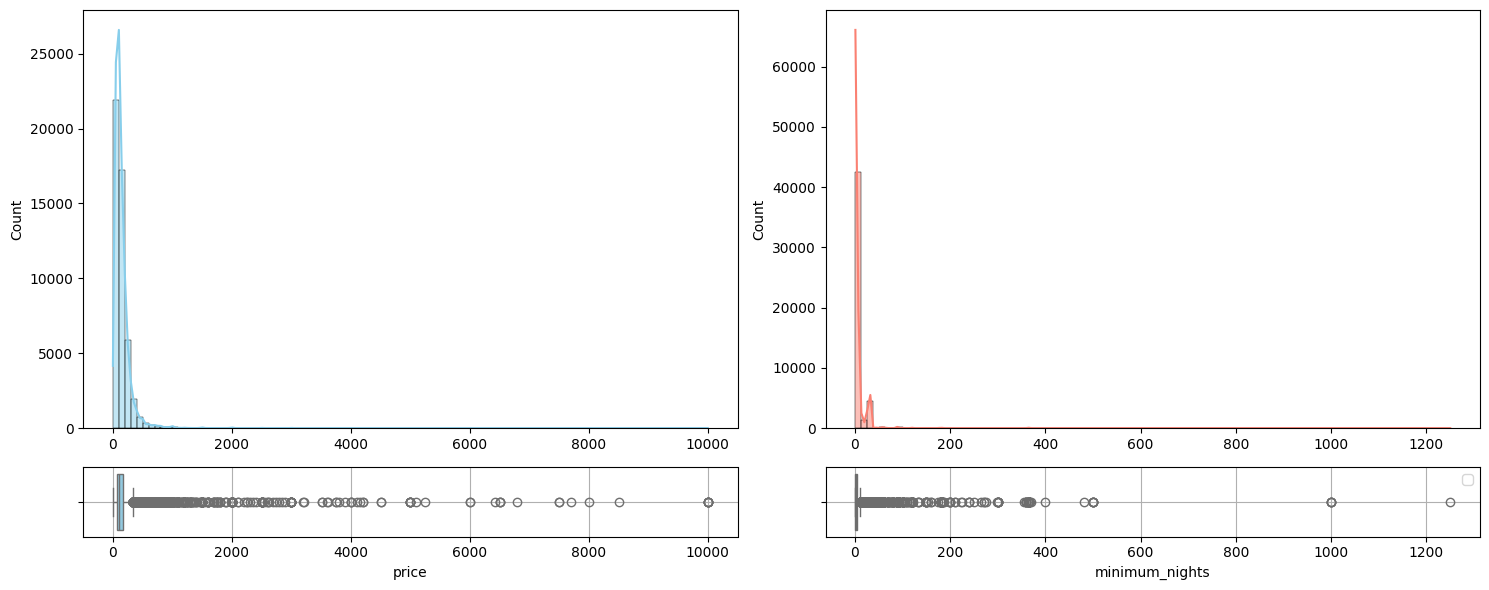

In [19]:
# STEP 7) Univariate Numerical Variables Analysis Visualization: 'price', 'minimum_nights', 'number_of_reviews','reviews_per_month'

# 7.B) Outliers overview ('price', 'minimum_nights')

import pandas as pd

fig, axis = plt.subplots(2,2, figsize = (15,6), gridspec_kw={'height_ratios': [6, 1]})

#"price"
sns.histplot(ax=axis[0, 0], data=df, x="price", bins=100, kde=True, color='skyblue').set(xlabel=None)
sns.boxplot(ax=axis[1,0], data=df, x = 'price', color='skyblue').grid(True)

#'minimum_nights'
sns.histplot(ax=axis[0, 1], data=df, x="minimum_nights", bins=100, kde=True, color='salmon').set(xlabel=None)
sns.boxplot(ax=axis[1,1], data = df, x = 'minimum_nights', color='salmon').grid(True)

plt.tight_layout()
plt.legend()
plt.show()

/tmp/ipykernel_38368/3360934426.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


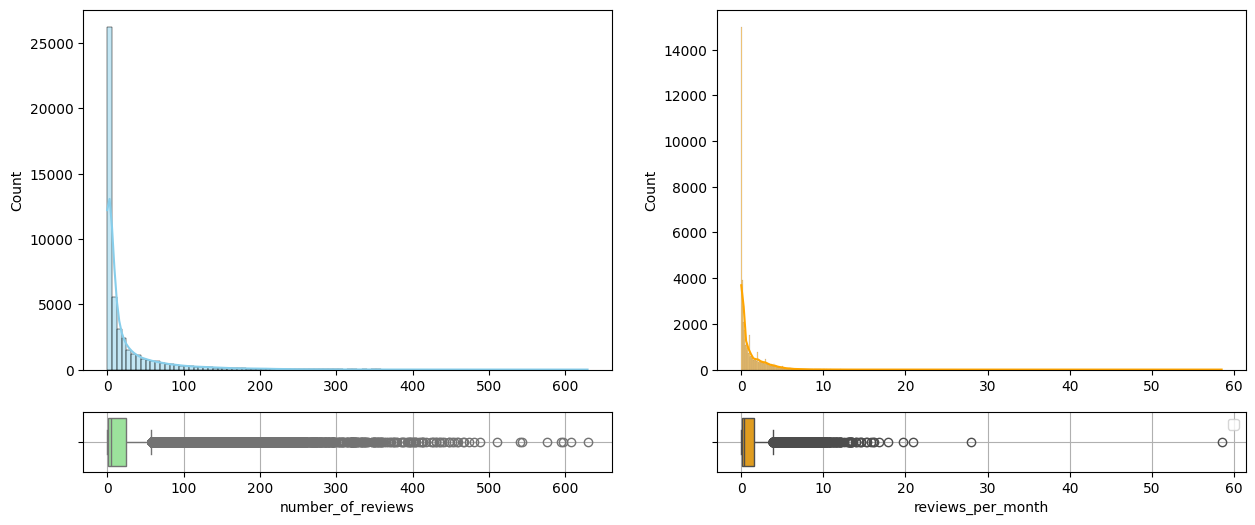

In [20]:
# STEP 7) Univariate Numerical Variables Analysis Visualization: 'price', 'minimum_nights', 'number_of_reviews','reviews_per_month'

# 7.C) Outliers overview ('number_of_reviews', 'reviews_per_month')

fig, axis = plt.subplots(2,2, figsize = (15,6), gridspec_kw={'height_ratios': [6, 1]})

#'number_of_reviews'
sns.histplot(ax=axis[0, 0], data=df, x='number_of_reviews', bins=100, kde=True, color='skyblue').set(xlabel=None)
sns.boxplot(ax=axis[1,0], data = df, x = 'number_of_reviews', color='lightgreen').grid(True)

#'reviews_per_month'
sns.histplot(ax=axis[0,1], data = df, x = 'reviews_per_month', binrange=(0, df['reviews_per_month'].max()), kde=True, color='orange').set(xlabel=None)
sns.boxplot(ax=axis[1,1], data = df, x = 'reviews_per_month', color='orange').grid(True)

plt.legend()
plt.show()

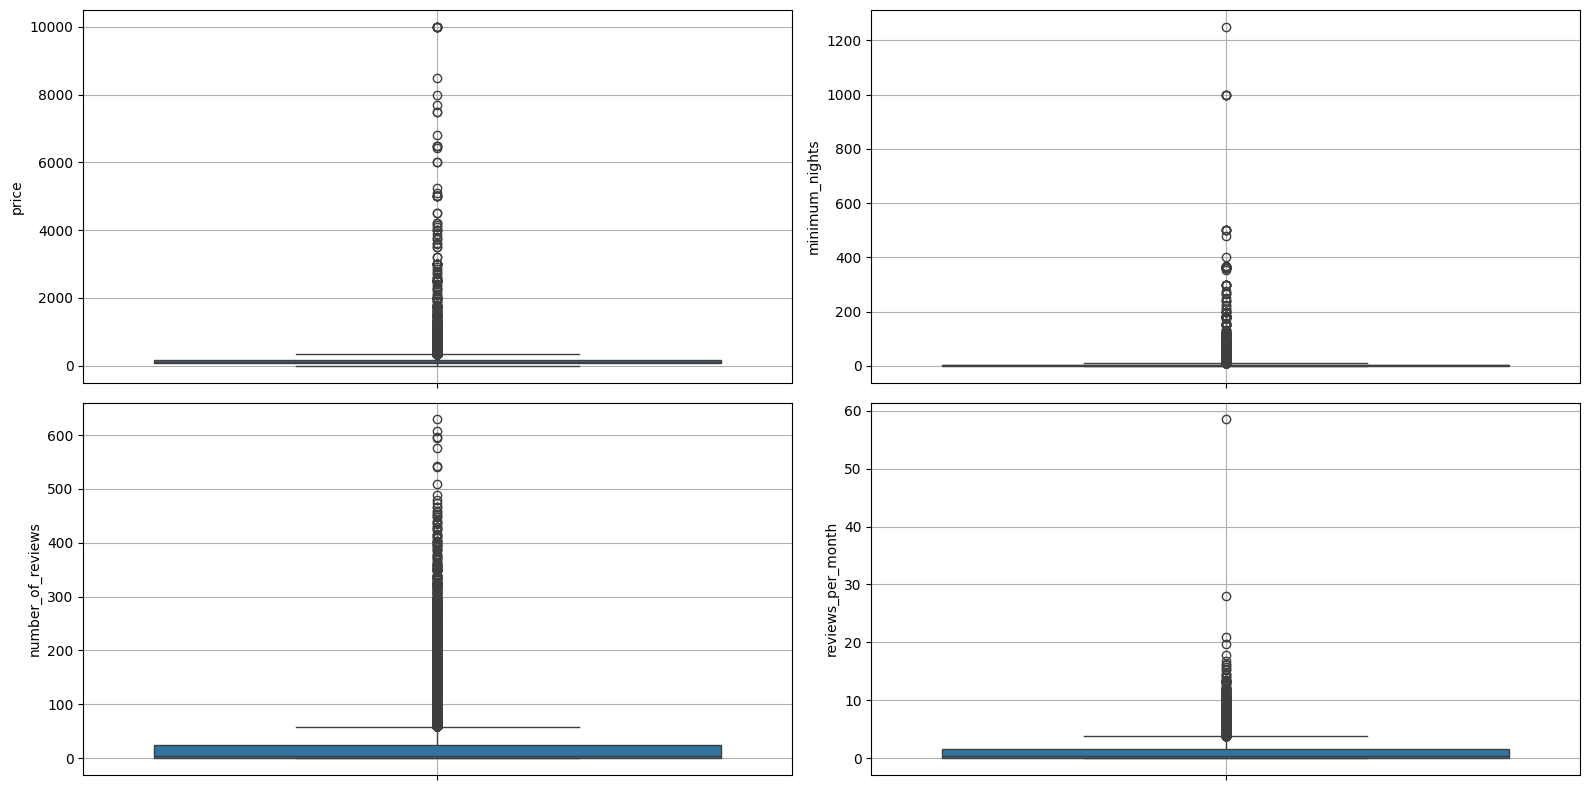

In [21]:
# STEP 7) Univariate Numerical Variables Analysis Visualization: 'price', 'minimum_nights', 'number_of_reviews','reviews_per_month'

# 7.D) Zooming in into outliers ('price', 'minimum_nights', 'number_of_reviews','reviews_per_month')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(2, 2, figsize = (16, 8))

sns.boxplot(ax = axis[0, 0], data = df, y = 'price').grid(True)
sns.boxplot(ax = axis[0, 1], data = df, y = 'minimum_nights').grid(True)
sns.boxplot(ax = axis[1, 0], data = df, y = 'number_of_reviews').grid(True)
sns.boxplot(ax = axis[1, 1], data = df, y = 'reviews_per_month').grid(True)


plt.tight_layout()

In [22]:
# STEP 7) Univariate Numerical Variables Analysis Visualization: 'price', 'minimum_nights', 'number_of_reviews','reviews_per_month'

# 7.D) Deciding what to do with outliers of 'reviews_per_month'

# Calculate the first quartile (Q1) and the third quartile (Q3)
Q1 = df['reviews_per_month'].quantile(0.25)
Q3 = df['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper limits
lower_limit = Q1 - 3 * IQR
upper_limit = Q3 + 3 * IQR

print(f"Regardless the upper and lower limits of reviews_per_month are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(IQR, 2)}, based on the previous boxplot for this variable, we will further check how many outlier are above the visible upper value in >=29 of reviews per month in order to better decide what to do with the outliers")

Regardless the upper and lower limits of reviews_per_month are 6.2 and -4.58, with an interquartile range of 1.54, based on the previous boxplot for this variable, we will further check how many outlier are above the visible upper value in >=29 of reviews per month in order to better decide what to do with the outliers


In [23]:
# STEP 7) Univariate Numerical Variables Analysis Visualization: 'price', 'minimum_nights', 'number_of_reviews','reviews_per_month'

# 7.D) Further deciding what to do with outliers of 'reviews_per_month'

# Calculating how many registries are above the visible upper limits based on the plot
reviews_month_outliers = df[df['reviews_per_month'] >= 29]

above29_reviews_month = len(reviews_month_outliers.sort_values(by=['reviews_per_month'], ascending=False))

print(f"Despite there is just {above29_reviews_month} listing above 29 reviews per month, we will still keep this registry since this is outliner is plausible and worth being considered in our model")

Despite there is just 1 listing above 29 reviews per month, we will still keep this registry since this is outliner is plausible and worth being considered in our model


In [24]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Area,room_type_n,last_review_n,Area_n,neighbourhood_group_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Brooklyn/Kensington,0,0,0,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Manhattan/Midtown,1,1,1,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Missing date,0.00,1,365,Manhattan/Harlem,0,2,2,1
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Brooklyn/Clinton Hill,1,3,3,0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Manhattan/East Harlem,1,4,4,1


In [25]:
# STEP 7) Univariate Numerical Variables Analysis Visualization: 'price', 'minimum_nights', 'number_of_reviews','reviews_per_month'

# 7.E) Deciding what to do with outliers of 'minimum_nights'

# Calculate the first quartile (Q1) and the third quartile (Q3)
print("Mean: ", df['minimum_nights'].mean())
print("Median: ", df['minimum_nights'].median())
print("Max: ", df['minimum_nights'].max())
print("Min: ", df['minimum_nights'].min())

Q1 = df['minimum_nights'].quantile(0.25)
Q3 = df['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper limits
lower_limit = Q1 - 3 * IQR
upper_limit = Q3 + 3 * IQR

min_nights_upper_outliners = len(df[df['minimum_nights'] >= upper_limit])
boxplot_min_nights_upper_outliners = len(df[df['minimum_nights'] >= 1000])

print(f"We will also keep the outliners for 'minimum_nights' as those could be rellevant for the model, althought there are {boxplot_min_nights_upper_outliners} registries above 1000 based on the boxplot, and that the upper and lower limits are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(IQR, 2)}")

Mean:  7.029962163820431
Median:  3.0
Max:  1250
Min:  1
We will also keep the outliners for 'minimum_nights' as those could be rellevant for the model, althought there are 2 registries above 1000 based on the boxplot, and that the upper and lower limits are 17.0 and -11.0, with an interquartile range of 4.0


In [33]:
# STEP 7) Finalizing Univariate Numeric Analysis: Confirming there are no missing nor null values before the multivariate analysis

df.isnull().sum()


neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
Area                              0
room_type_n                       0
last_review_n                     0
Area_n                            0
neighbourhood_group_n             0
dtype: int64

In [34]:
df.shape

(48895, 17)

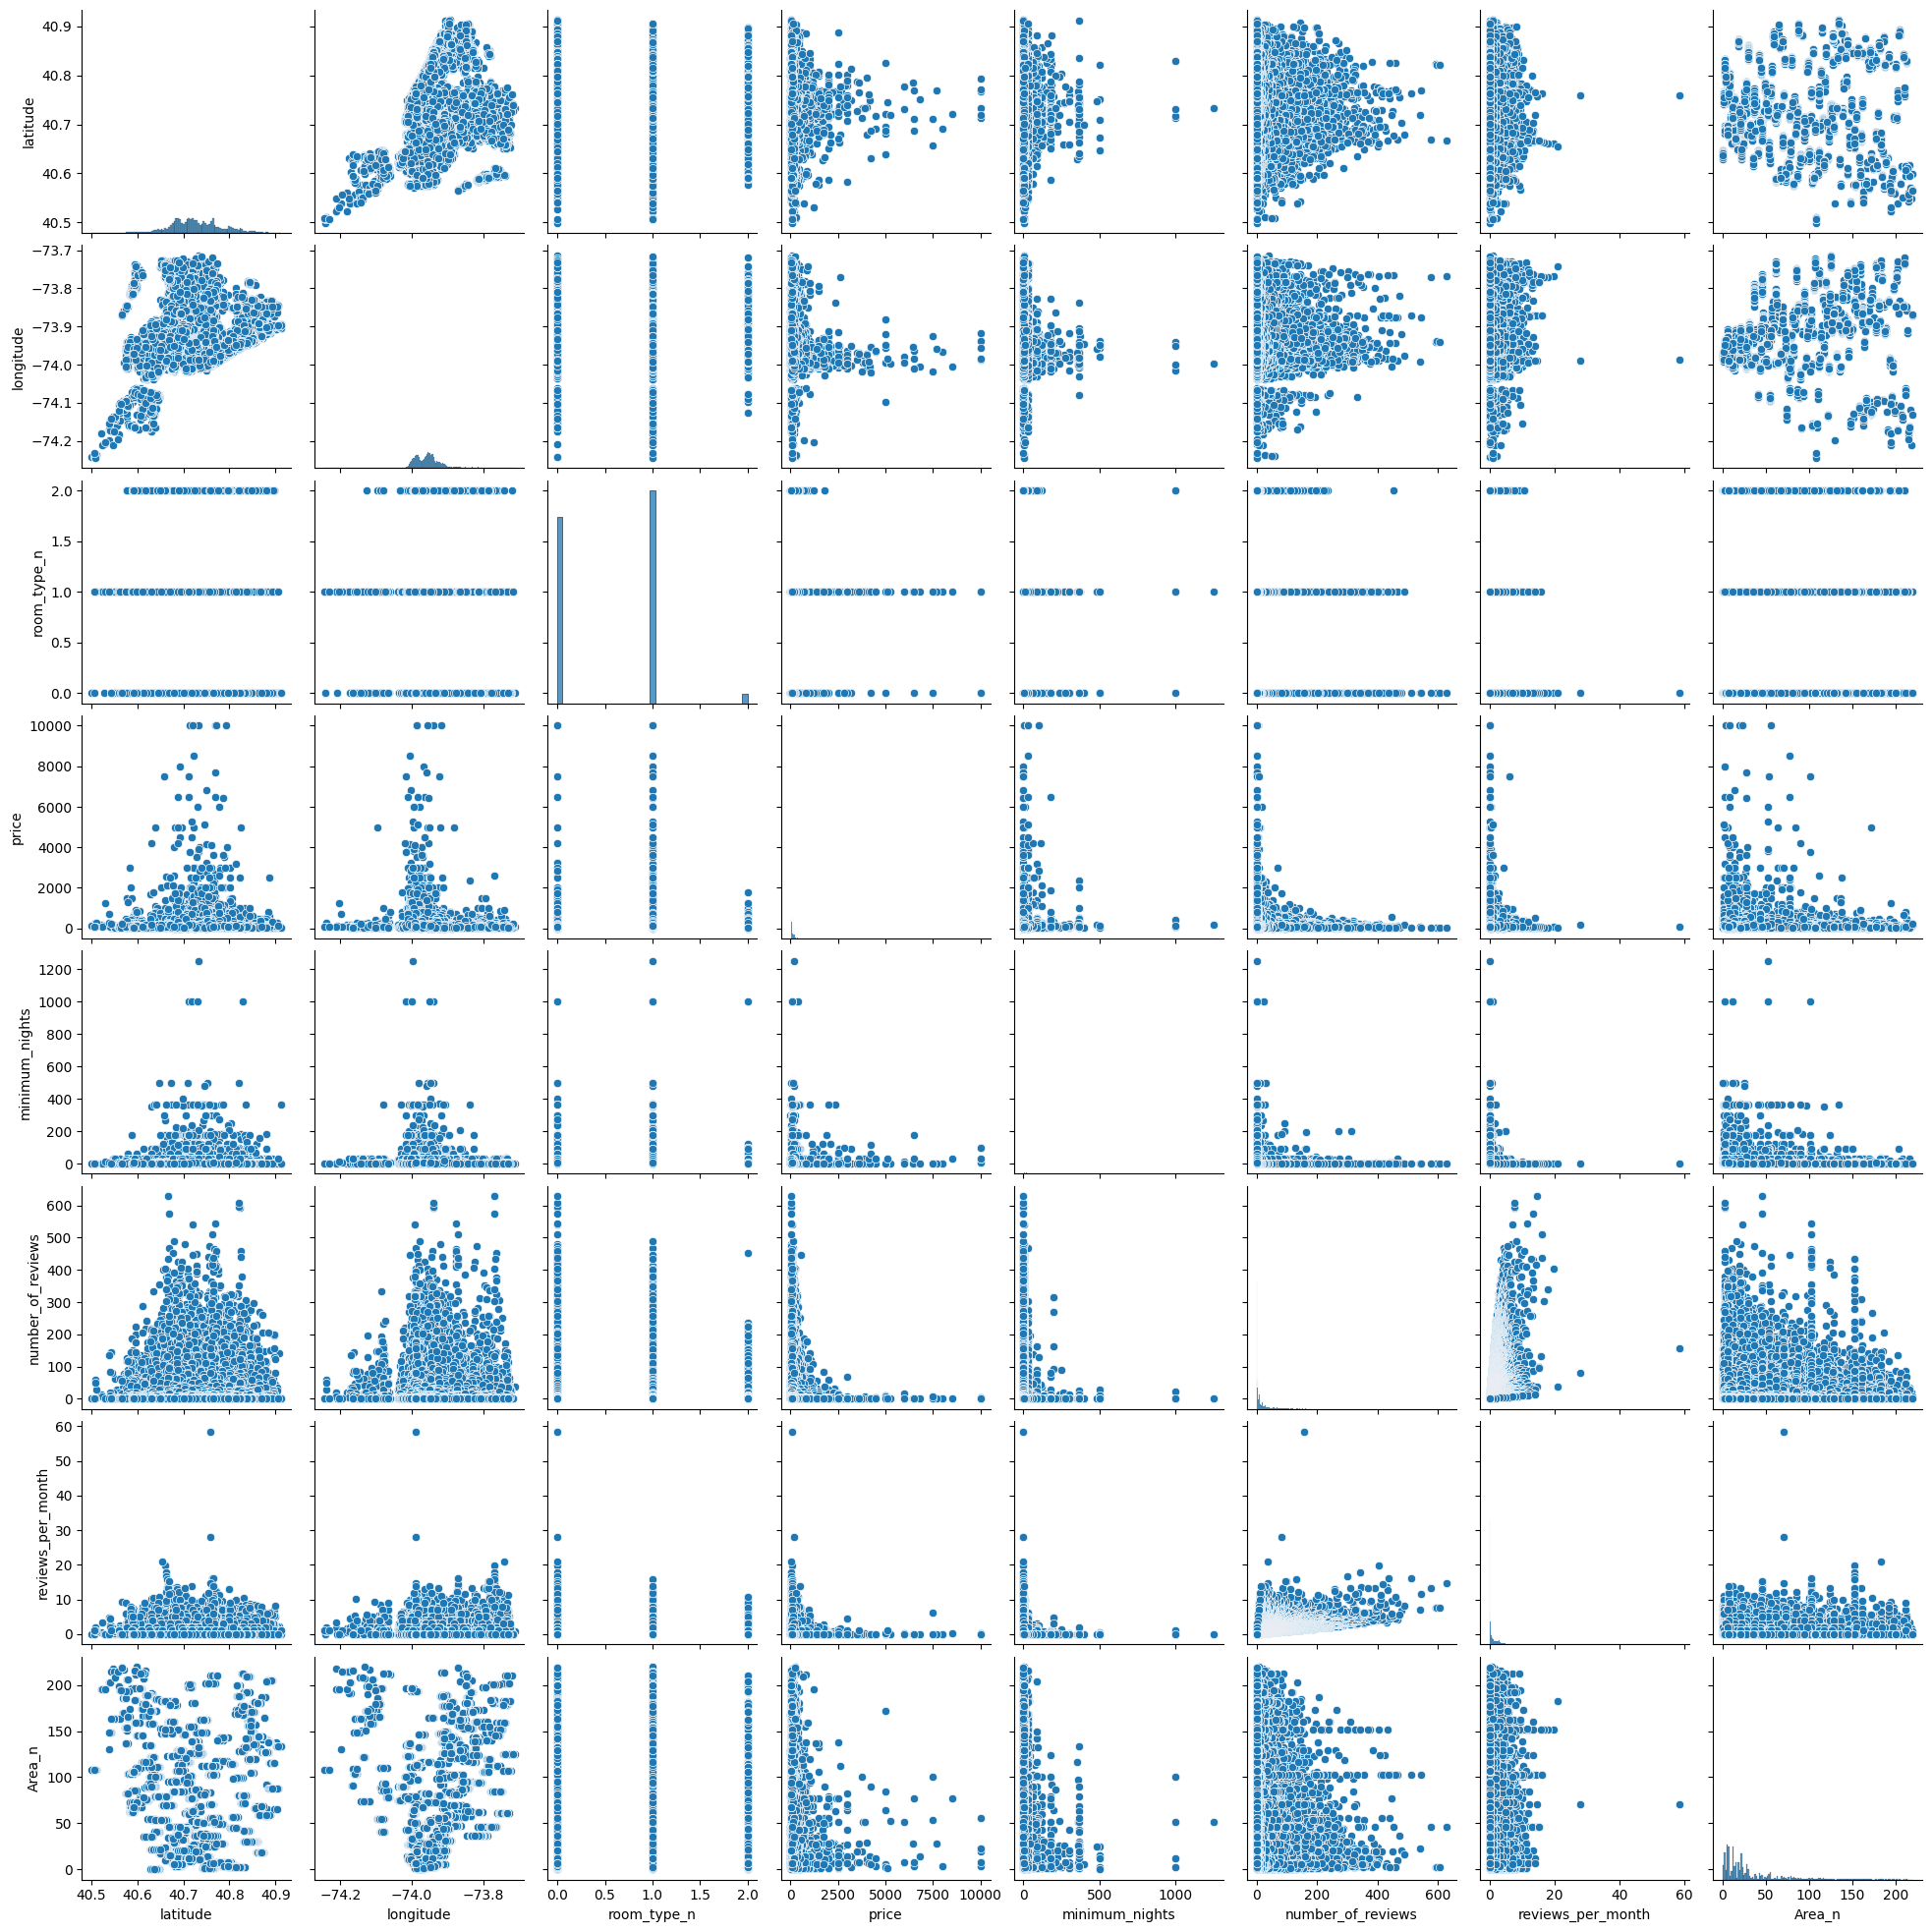

In [35]:
# STEP 8) First Multivariate Analysis

# 8.A) Scatterplot Correlations Overview

df_correlations = df[["latitude","longitude", "room_type_n", "price","minimum_nights","number_of_reviews", "reviews_per_month", "Area_n"]]
sns.pairplot(data = df_correlations)


In [26]:
# Correlations Data quality check:

df_correlations = df[["latitude","longitude", "room_type_n", "price","minimum_nights","number_of_reviews", "reviews_per_month", "Area_n"]]

df_correlations.isnull().sum()

latitude             0
longitude            0
room_type_n          0
price                0
minimum_nights       0
number_of_reviews    0
reviews_per_month    0
Area_n               0
dtype: int64

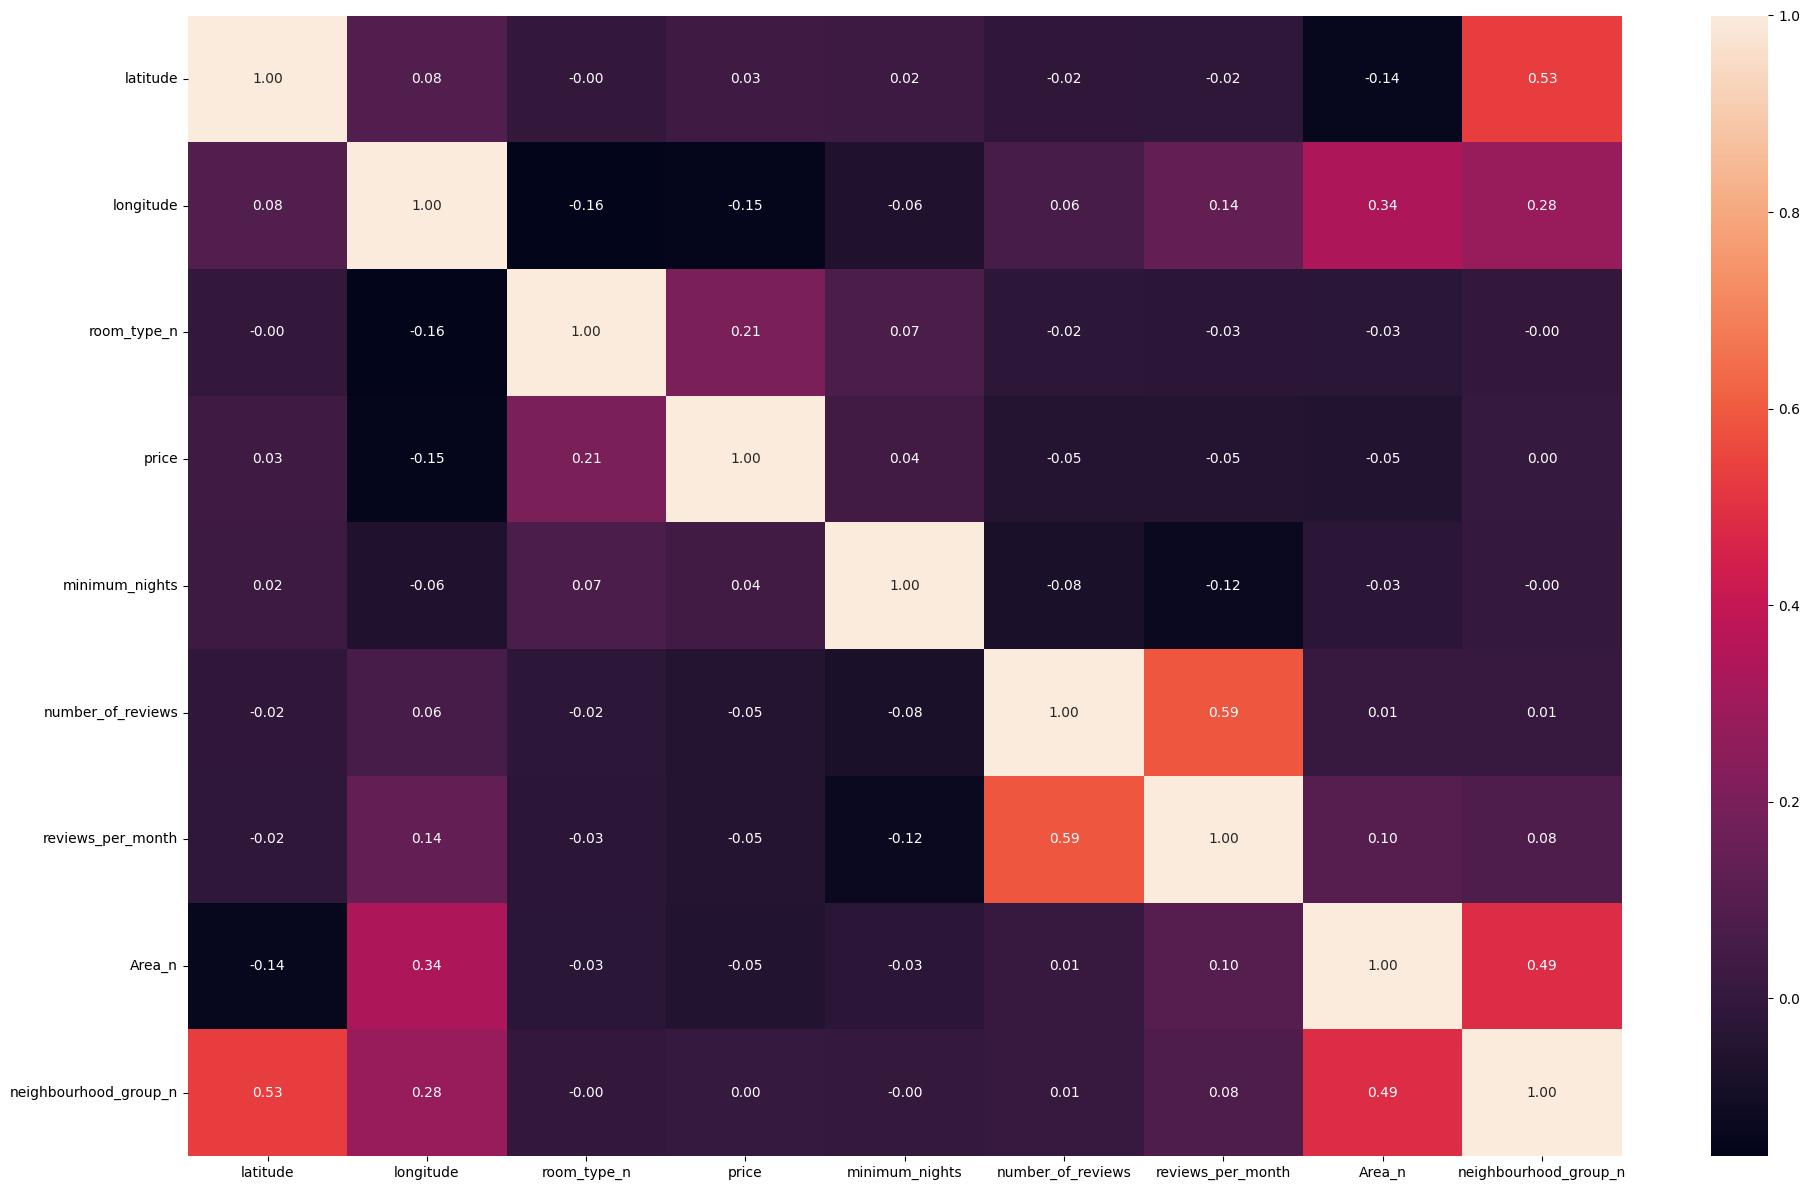

In [37]:
# STEP 8) First Multivariate Analysis: 

# 8.B) Heatmap Correlations Overview 

fig, axis = plt.subplots(figsize = (20, 12))

sns.heatmap(df[["latitude","longitude", "room_type_n", "price","minimum_nights","number_of_reviews", "reviews_per_month", "Area_n", "neighbourhood_group_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [53]:
# STEP 8) Multivariate Analysis: 

# 8.C) Identifying correlations above 70% with "Price"

df_correlations = df[["latitude","longitude", "room_type_n", "price","minimum_nights","number_of_reviews", "reviews_per_month", "Area_n"]]


# Calculate correlations with 'price'
price_correlation = df_correlations.corr()['price'].drop('price')

# Filter for correlations above 0.7
price_high_correlation = price_correlation[abs(price_correlation) > 0.7]

# Filter the min correlation treshold
some_correlation = price_correlation[abs(price_correlation) >= 0.15]  # Use abs for both positive & negative

if not price_high_correlation.empty:
    print(f"There is a significant correlation (above 70%) between 'Price' and {price_high_correlation}")
elif not some_correlation.empty:
    print("There is no significant correlation (above 70%) between 'Price' and any other variable.")
    print("However, there are small correlations (above 20% or below -10%) with:")
    for variable, correlation in some_correlation.items():
        print(f"  - {variable}: {correlation:.2f}")  # Format correlation to 2 decimal places
else:
    print("There are is no correlation worth mentioning between 'Price' and any other variable")

There is no significant correlation (above 70%) between 'Price' and any other variable.
However, there are small correlations (above 20% or below -10%) with:
  - longitude: -0.15
  - room_type_n: 0.21


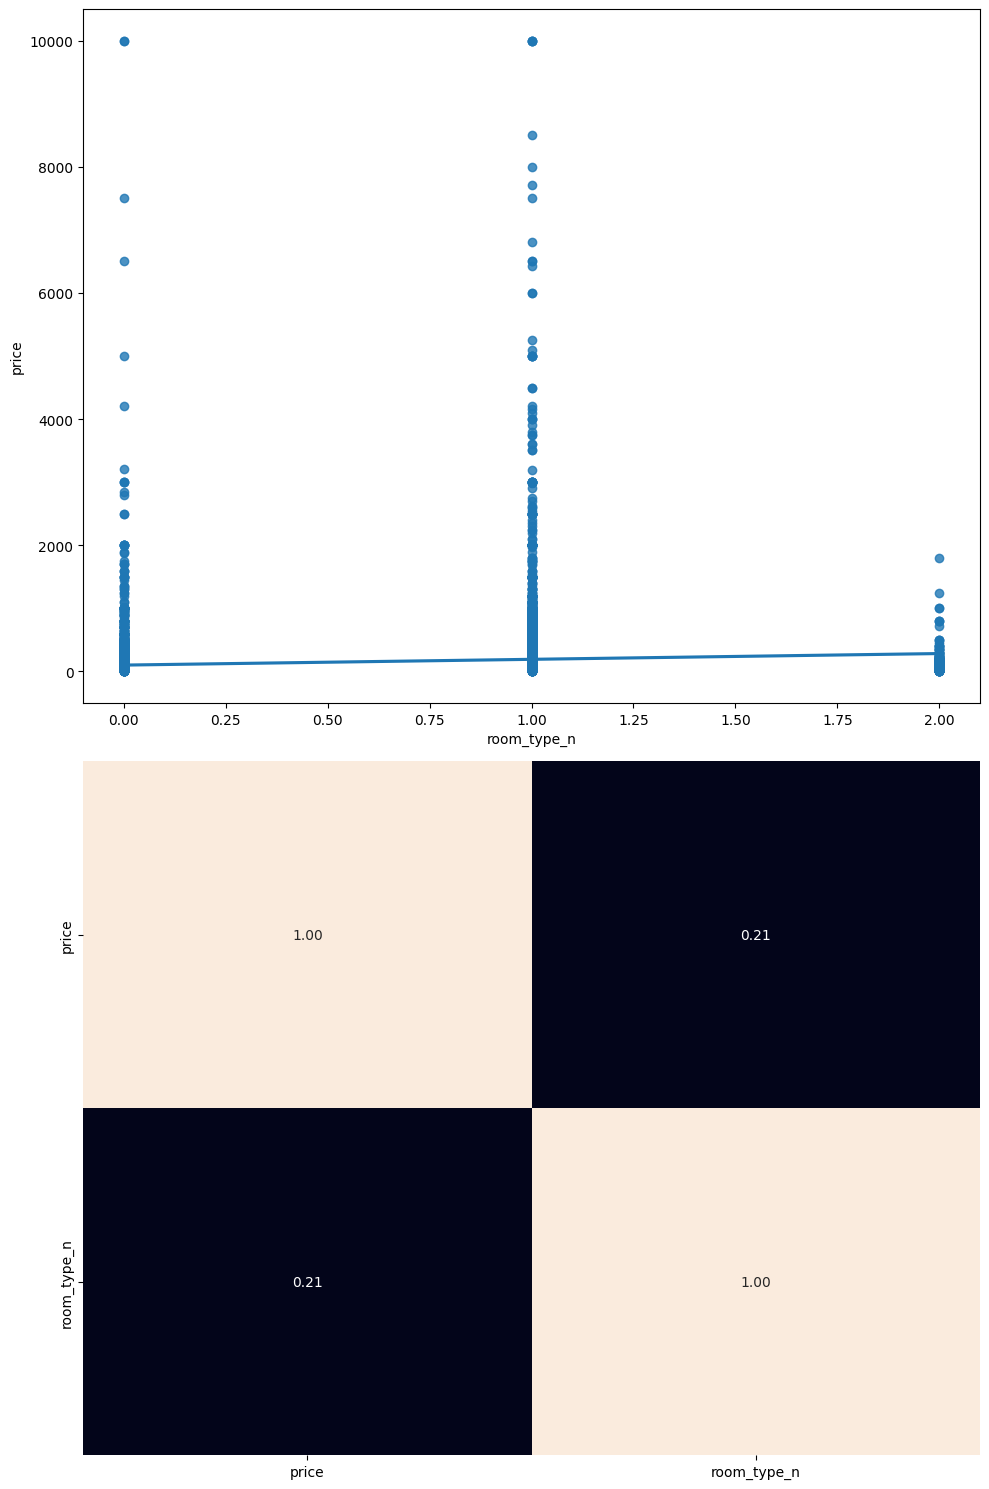

In [ ]:
# STEP 8) Multivariate Analysis: 

# 8.D) Zooming in into the slight correlation between "Price" and room_type:

fig, axis = plt.subplots(2, 1, figsize=(10,15)) 

sns.regplot(data=df, x="room_type_n", y="price", ax=axis[0]) 
sns.heatmap(df[["price", "room_type_n"]].corr(), annot=True, fmt=".2f", ax=axis[1], cbar=False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

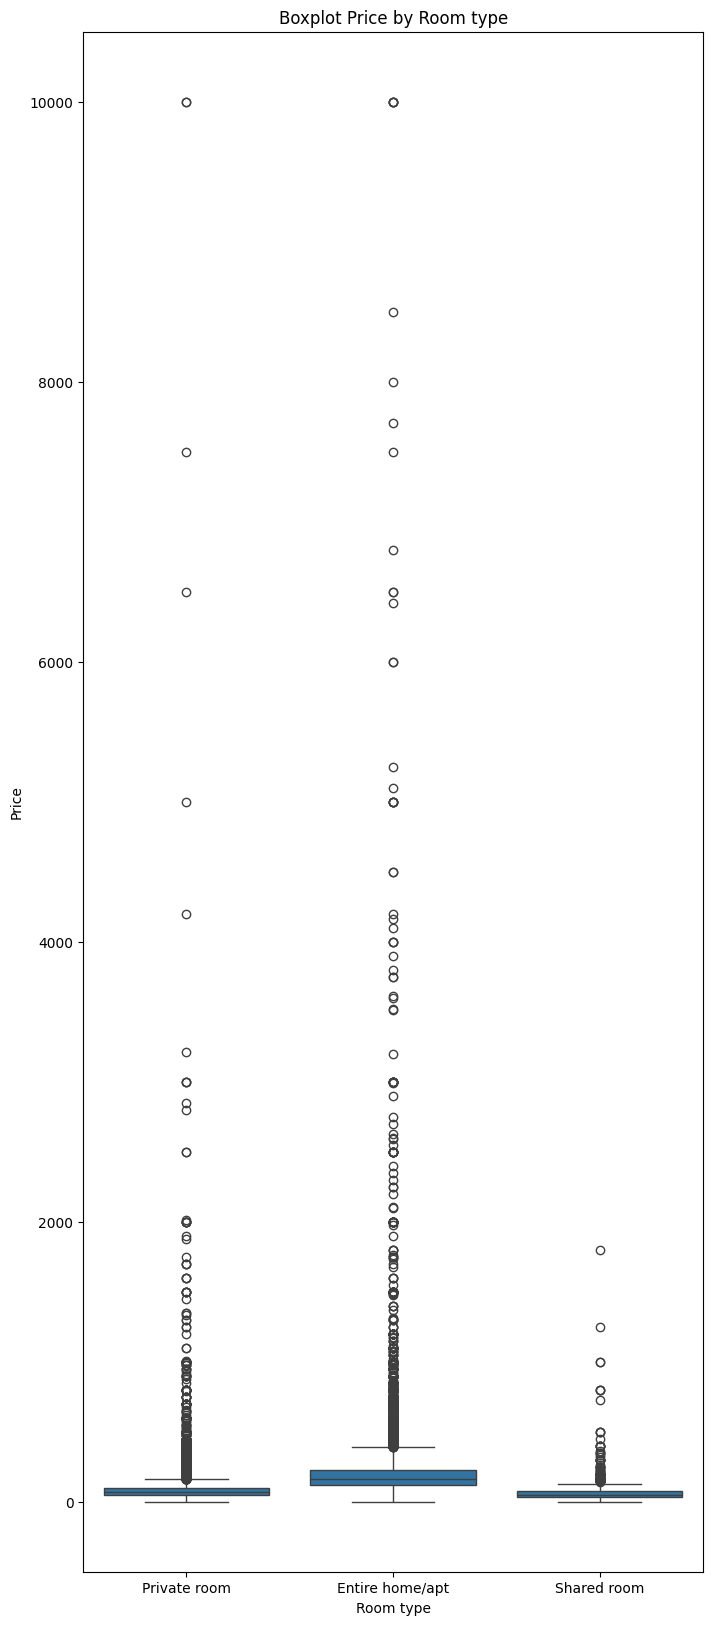

The boxplots show a clear trend of increasing price as you move from shared rooms to private rooms and then to entire homes/apartments. This suggests a moderate positive correlation (21%) between room type and price in the Airbnb dataset.
In a more in-depth conclussion, we see that the median Price for each room type (The horizontal line inside each box represents the median price), is higher and shows a potential correlation between room type and price than other types. In this case, 'Entire home/apt' has a noticeably higher median price than 'Private room' and 'Shared room.
Also and since the box itself represents the interquartile range (IQR), containing the middle (50%) of the data and the box height indicates the variability of prices within each room type, 'Entire home/apt' has a larger IQR thant the other types, suggesting more price variability for this room type.
Finally and based on the outliers, they are also more pronounced for 'Entire home/apt,' further supporting the pric

In [ ]:
# STEP 8) Multivariate Analysis: 

# 8.E) Zooming in into the slight correlation between "Price" and "room_type":

plt.figure(figsize=(8, 20))

sns.boxplot(x="room_type", y="price", data=df)

plt.title('Boxplot Price by Room type')
plt.xlabel('Room type')
plt.ylabel('Price')
plt.show()

print("The boxplots show a clear trend of increasing price as you move from shared rooms to private rooms and then to entire homes/apartments. This suggests a moderate positive correlation (21%) between room type and price in the Airbnb dataset.")
print("In a more in-depth conclussion, we see that the median Price for each room type (The horizontal line inside each box represents the median price), is higher and shows a potential correlation between room type and price than other types. In this case, 'Entire home/apt' has a noticeably higher median price than 'Private room' and 'Shared room.")
print("Also and since the box itself represents the interquartile range (IQR), containing the middle (50%) of the data and the box height indicates the variability of prices within each room type, 'Entire home/apt' has a larger IQR thant the other types, suggesting more price variability for this room type.")
print("Finally and based on the outliers, they are also more pronounced for 'Entire home/apt,' further supporting the price difference.")

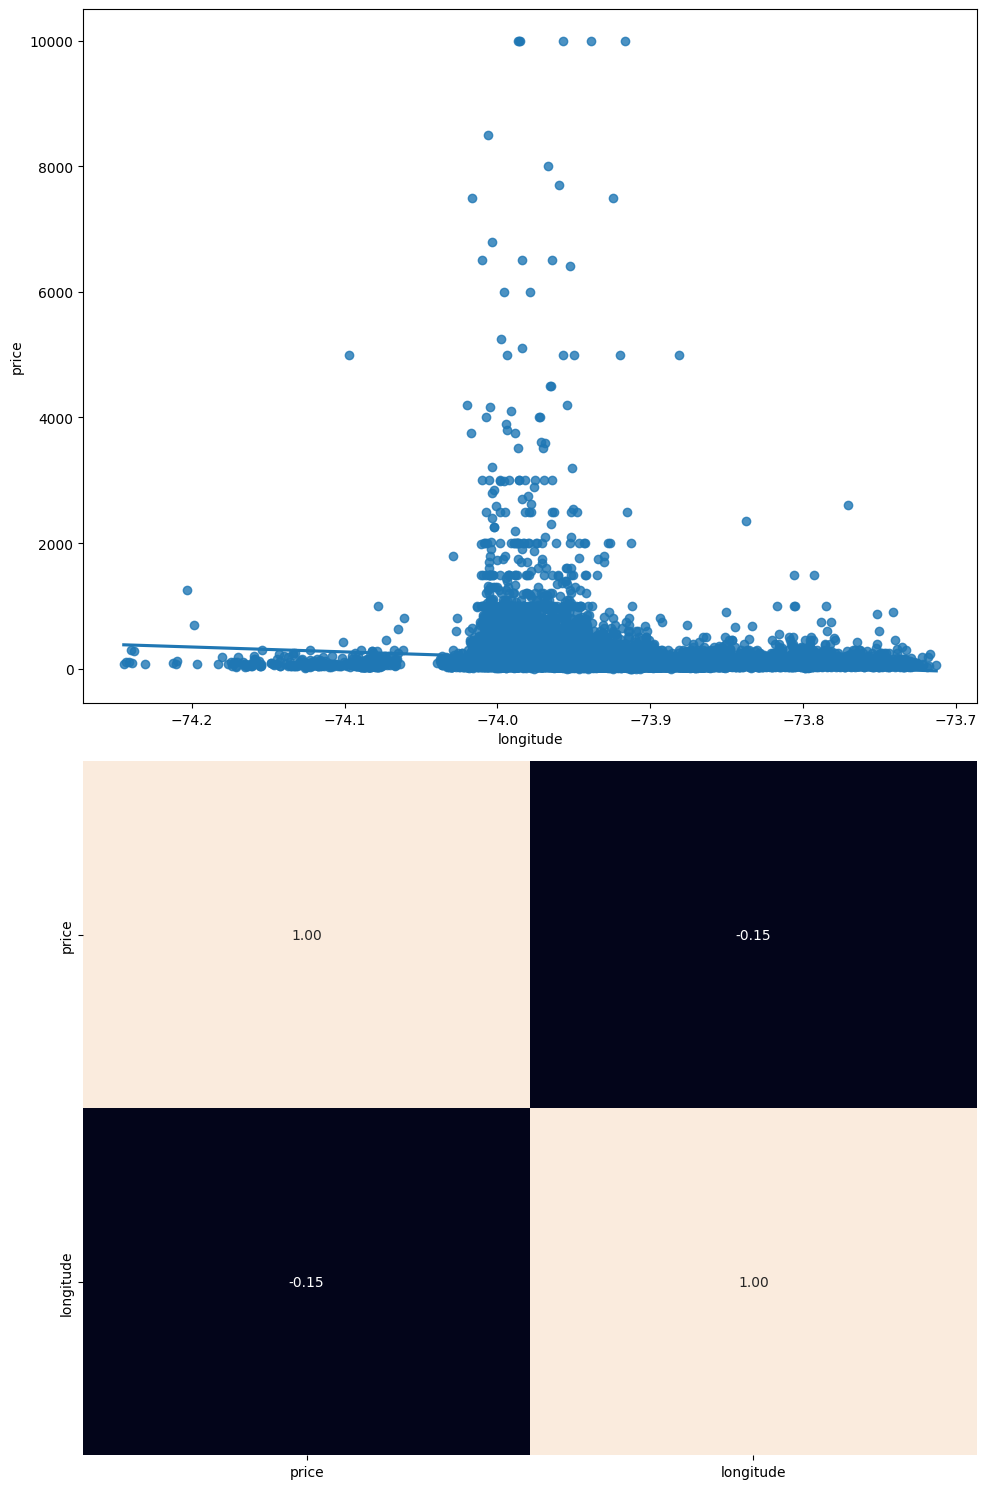

The boxplot show a slight trend of decreasing price as you move to lower longitudes (to Western NY). This suggests a moderate negative correlation (-15%) between longitude and price in the Airbnb dataset, being slightly more expensive listing located in the East side of NY.


In [31]:
# STEP 8) Multivariate Analysis: 

# 8.F) Zooming in into the slight inverse correlation between "Price" and "longitud":

fig, axis = plt.subplots(2, 1, figsize=(10,15)) 

sns.regplot(data=df, x="longitude", y="price", ax=axis[0]) 
sns.heatmap(df[["price", "longitude"]].corr(), annot=True, fmt=".2f", ax=axis[1], cbar=False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

print("The boxplot show a slight trend of decreasing price as you move to lower longitudes (to Western NY). This suggests a moderate negative correlation (-15%) between longitude and price in the Airbnb dataset, being slightly more expensive listing located in the East side of NY.")


In [ ]:
# NO SE PUEDE EJECUTAR - BLOQUEA EL KERNEL:

# STEP 8) Multivariate Analysis: 

# 8.G) Zooming in into the slight inverse correlation between "Price" and "longitud":

plt.figure(figsize=(8, 20))

sns.boxplot(x="longitude", y="price", data=df)

plt.title('Boxplot Price by longitude')
plt.xlabel('Longitude')
plt.ylabel('Price')
plt.show()



: 

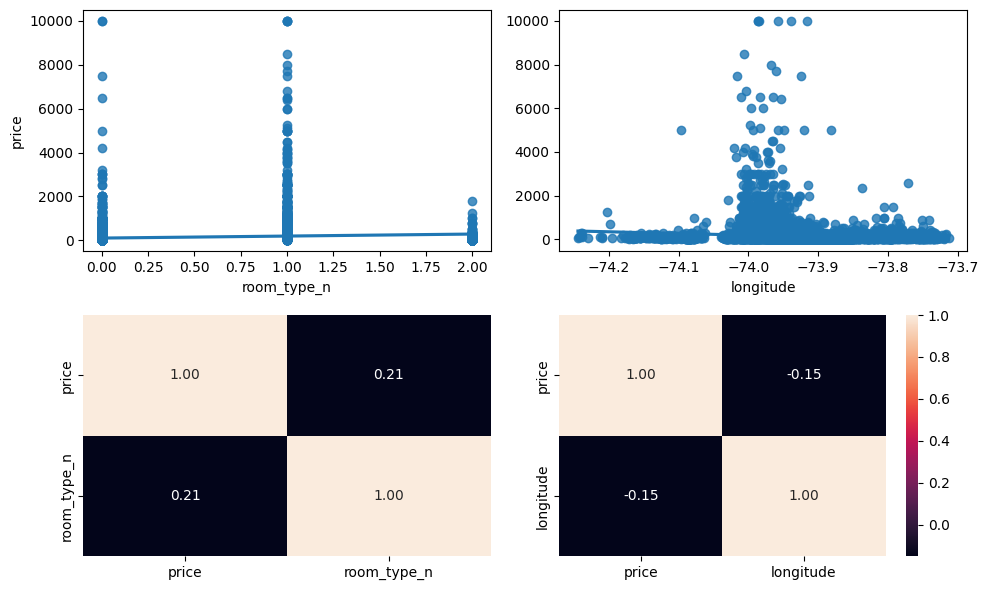

These plots reconfirm the slight correlations between price and room type and longitude respectively


In [33]:
# STEP 8) Multivariate Analysis: 

import matplotlib.pyplot as plt 
import seaborn as sns
# 8.F) Numerical-Numerical Analysis

fig, axis = plt.subplots(2, 2, figsize = (10, 6))

# Create a multiple scatter plot
sns.regplot(ax = axis[0, 0], data = df, x = "room_type_n", y = "price")
sns.heatmap(df[["price", "room_type_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "longitude", y = "price").set(ylabel=None)
sns.heatmap(df[["price", "longitude"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

print("These plots reconfirm the slight correlations between price and room type and longitude respectively")


In [ ]:
# STEP 8) Multivariate Analysis: 

# 8.E) Identifying other correlations between variables

df_correlations = df[["latitude","longitude", "room_type_n", "price","minimum_nights","number_of_reviews", "reviews_per_month", "Area_n"]]

import matplotlib.pyplot as plt
import pandas as pd

# Calculate correlations between variables

# Get a list of all column names
columns = df_correlations.columns

# Iterate through all combinations of columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        var1 = columns[i]
        var2 = columns[j]

        # Calculate the correlation between the two variables
        correlation = df_correlations[var1].corr(df_correlations[var2])

        # Check if the correlation is above 0.7
        if correlation > 0.7 or correlation < -0.7:
            print(f"There is a significant correlation (above 70%) between {var1} and {var2}: {round(correlation * 100),4}%")
            significant_correlation_found = True
        elif correlation > 0.5 or correlation < -0.5:
            print(f"There is some correlation (above 50%) between {var1} and {var2}: {round(correlation * 100, 2)}%")
        else:
            print("There is no significant correlation (above 70%) between any of the variables")
            break

There is no significant correlation (above 70%) between any of the variables
There is no significant correlation (above 70%) between any of the variables
There is no significant correlation (above 70%) between any of the variables
There is no significant correlation (above 70%) between any of the variables
There is no significant correlation (above 70%) between any of the variables
There is some correlation (above 50%) between number_of_reviews and reviews_per_month: 58.94%
There is no significant correlation (above 70%) between any of the variables
There is no significant correlation (above 70%) between any of the variables
